# Section 1: Dataset

For this Data Science project, I chose the Mobiles Dataset (2025), which contains detailed specifications and official launch prices of several different smartphone models from different companies across the globe. The dataset includes information such as RAM, camera specifications, battery capacity, processor details, screen size, and pricing information in 5 countries. 

I chose this dataset because phones are a central part of daily life and a rapidly evolving technology. I have always wanted to know how phone features have changed over the years, how companies price their devices differently depending on the country, and how these factors can influence consumer choices. Phones are something I use every day, and I am excited to understand the data that shapes the products I interact with constantly. 

I found this dataset by just scrolling through a list of datasets on Kaggle and found it to be interesting. I chose this dataset because it information on devices' features and prices, which I think makes it suitable for exploring trends over time and across different markets.

By using this dataset, few questions I want discover include:
- Number of phones each brand released from 2020 - 2025 (All Brands) & (Top 10) - Visualization (Section 3)
- How many phones have 6GB, 8GB, and 12GB RAM?
- Price Range for companies (Apple & Google)
- Average prices per Company per Country from 2020 - 2025

In [84]:
import pandas as pd

df = pd.read_csv("Mobiles Dataset (2025).csv")
df

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 224,999","INR 79,999","CNY 5,799",USD 799,"AED 2,799",2024
1,Apple,iPhone 16 256GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 234,999","INR 84,999","CNY 6,099",USD 849,"AED 2,999",2024
2,Apple,iPhone 16 512GB,174g,6GB,12MP,48MP,A17 Bionic,"3,600mAh",6.1 inches,"PKR 244,999","INR 89,999","CNY 6,499",USD 899,"AED 3,199",2024
3,Apple,iPhone 16 Plus 128GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 249,999","INR 89,999","CNY 6,199",USD 899,"AED 3,199",2024
4,Apple,iPhone 16 Plus 256GB,203g,6GB,12MP,48MP,A17 Bionic,"4,200mAh",6.7 inches,"PKR 259,999","INR 94,999","CNY 6,499",USD 949,"AED 3,399",2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Poco,Pad 5G 128GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 66,220","INR 23,999","CNY 2,099",USD 280,"AED 1,029",2024
926,Poco,Pad 5G 256GB,571g,8GB,8MP,8MP,Snapdragon 7s Gen 2,"10,000mAh",12.1 inches,"PKR 71,220","INR 25,999","CNY 2,299",USD 300,"AED 1,099",2024
927,Samsung,Galaxy Z Fold6 256GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 604,999","INR 164,999","�13,999","USD 1,899","AED 7,199",2024
928,Samsung,Galaxy Z Fold6 512GB,239g,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400mAh,7.6 inches,"PKR 544,999","INR 176,999","CNY 15,999",USD 1719,"AED 7,699",2024


1. Cleaning the Dataset: For this part, I am cleaning the dataset by taking out all the alphabets and commas in the launched price columns of the countries. That way, I can use those columns to do analysis for the later part of the project. 

In [85]:
def keep_only_numbers(value):
    value = str(value)
    result = ""
    for char in value:
        if char.isdigit():
            result += char
        if result == "":
            result = "0"
    return result 

df["Launched Price (Pakistan)"] = df["Launched Price (Pakistan)"].apply(keep_only_numbers)
df["Launched Price (India)"] = df["Launched Price (India)"].apply(keep_only_numbers)
df["Launched Price (China)"] = df["Launched Price (China)"].apply(keep_only_numbers)
df["Launched Price (USA)"] = df["Launched Price (USA)"].apply(keep_only_numbers)
df["Launched Price (Dubai)"] = df["Launched Price (Dubai)"].apply(keep_only_numbers)

df["Mobile Weight"] = df["Mobile Weight"].apply(keep_only_numbers)
df["Battery Capacity"] = df["Battery Capacity"].apply(keep_only_numbers)
df["Screen Size"] = df["Screen Size"].apply(keep_only_numbers)

df


,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year
0,Apple,iPhone 16 128GB,174,6GB,12MP,48MP,A17 Bionic,3600,61,0224999,079999,05799,0799,02799,2024
1,Apple,iPhone 16 256GB,174,6GB,12MP,48MP,A17 Bionic,3600,61,0234999,084999,06099,0849,02999,2024
2,Apple,iPhone 16 512GB,174,6GB,12MP,48MP,A17 Bionic,3600,61,0244999,089999,06499,0899,03199,2024
3,Apple,iPhone 16 Plus 128GB,203,6GB,12MP,48MP,A17 Bionic,4200,67,0249999,089999,06199,0899,03199,2024
4,Apple,iPhone 16 Plus 256GB,203,6GB,12MP,48MP,A17 Bionic,4200,67,0259999,094999,06499,0949,03399,2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Poco,Pad 5G 128GB,571,8GB,8MP,8MP,Snapdragon 7s Gen 2,10000,121,066220,023999,02099,0280,01029,2024
926,Poco,Pad 5G 256GB,571,8GB,8MP,8MP,Snapdragon 7s Gen 2,10000,121,071220,025999,02299,0300,01099,2024
927,Samsung,Galaxy Z Fold6 256GB,239,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400,76,0604999,0164999,013999,01899,07199,2024
928,Samsung,Galaxy Z Fold6 512GB,239,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400,76,0544999,0176999,015999,01719,07699,2024


2. Converting: For this part, I am converting all the prices for all countries to USD that way it is easier to compare and do analysis on this dataset. 

In [86]:
exchange_rates = {
    "PKR": 0.0036, 
    "INR": 0.012,
    "CNY": 0.14,
    "AED": 0.27,
    "USD": 1
}

df["Price (PKR) USD"] = df["Launched Price (Pakistan)"].astype(float) * exchange_rates["PKR"]
df["Price (INR) USD"] = df["Launched Price (India)"].astype(float) * exchange_rates["INR"]
df["Price (CNY) USD"] = df["Launched Price (China)"].astype(float) * exchange_rates["CNY"]
df["Price (USA) USD"] = df["Launched Price (USA)"].astype(float) * exchange_rates["USD"]
df["Price (Dubai) USD"] = df["Launched Price (Dubai)"].astype(float) * exchange_rates["AED"]

df

,Company Name,Model Name,Mobile Weight,RAM,Front Camera,Back Camera,Processor,Battery Capacity,Screen Size,Launched Price (Pakistan),Launched Price (India),Launched Price (China),Launched Price (USA),Launched Price (Dubai),Launched Year,Price (PKR) USD,Price (INR) USD,Price (CNY) USD,Price (USA) USD,Price (Dubai) USD
0,Apple,iPhone 16 128GB,174,6GB,12MP,48MP,A17 Bionic,3600,61,0224999,079999,05799,0799,02799,2024,809.9964,959.988,811.86,799.0,755.73
1,Apple,iPhone 16 256GB,174,6GB,12MP,48MP,A17 Bionic,3600,61,0234999,084999,06099,0849,02999,2024,845.9964,1019.988,853.86,849.0,809.73
2,Apple,iPhone 16 512GB,174,6GB,12MP,48MP,A17 Bionic,3600,61,0244999,089999,06499,0899,03199,2024,881.9964,1079.988,909.86,899.0,863.73
3,Apple,iPhone 16 Plus 128GB,203,6GB,12MP,48MP,A17 Bionic,4200,67,0249999,089999,06199,0899,03199,2024,899.9964,1079.988,867.86,899.0,863.73
4,Apple,iPhone 16 Plus 256GB,203,6GB,12MP,48MP,A17 Bionic,4200,67,0259999,094999,06499,0949,03399,2024,935.9964,1139.988,909.86,949.0,917.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
925,Poco,Pad 5G 128GB,571,8GB,8MP,8MP,Snapdragon 7s Gen 2,10000,121,066220,023999,02099,0280,01029,2024,238.3920,287.988,293.86,280.0,277.83
926,Poco,Pad 5G 256GB,571,8GB,8MP,8MP,Snapdragon 7s Gen 2,10000,121,071220,025999,02299,0300,01099,2024,256.3920,311.988,321.86,300.0,296.73
927,Samsung,Galaxy Z Fold6 256GB,239,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400,76,0604999,0164999,013999,01899,07199,2024,2177.9964,1979.988,1959.86,1899.0,1943.73
928,Samsung,Galaxy Z Fold6 512GB,239,12GB,"10MP, 4MP (UDC)",50MP,Snapdragon 8 Gen 3,4400,76,0544999,0176999,015999,01719,07699,2024,1961.9964,2123.988,2239.86,1719.0,2078.73


3. Simple Commands

In [87]:
df.columns

Index(['Company Name', 'Model Name', 'Mobile Weight', 'RAM', 'Front Camera',
       'Back Camera', 'Processor', 'Battery Capacity', 'Screen Size',
       'Launched Price (Pakistan)', 'Launched Price (India)',
       'Launched Price (China)', 'Launched Price (USA)',
       'Launched Price (Dubai)', 'Launched Year', 'Price (PKR) USD',
       'Price (INR) USD', 'Price (CNY) USD', 'Price (USA) USD',
       'Price (Dubai) USD'],
      dtype='object')

In [88]:
df.describe()

,Launched Year,Price (PKR) USD,Price (INR) USD,Price (CNY) USD,Price (USA) USD,Price (Dubai) USD
count,930.000000,930.000000,930.000000,930.000000,930.000000,930.000000
mean,2022.193548,451.084270,606.921819,535.000215,1214.050538,589.662000
std,1.862080,365.839579,491.522152,387.250732,5133.719121,422.720543
min,2014.000000,0.000000,71.988000,69.860000,79.000000,80.730000
25%,2021.000000,197.996400,239.988000,237.895000,262.250000,270.000000
50%,2023.000000,305.998200,419.988000,392.000000,449.000000,452.250000
75%,2024.000000,647.996400,898.800000,769.860000,899.000000,863.730000
max,2025.000000,2177.996400,3299.988000,2519.860000,79077.000000,2996.730000


# Section 2: Exploratory Data Analysis

To get a broad understanding of the dataset, I want to use descriptive statistics to help me summarize and describe the main features of the data in a simple way. 
1. Measures of Center: Mean/median to help identify typical values of prices, battery capacities, and more. 
2. Measures of Spread: Min/Max and standard deviation show much variation there is in prices and specs. 
3. Size of the Datase: Knowing how many phones and features are included gives an idea of how large and useful the dataset is. 
4. Frequencies: The count of RAM sizes and how many phones each brand released helps understand what's the most common. 
5. Grouping and Aggregates: Comparing average prices or battery ranges between companies and countries reveals trends across different markets. 

I think that these statistics are helpful because they give an overview of the data and highlight patterns worth exploring more deeply later on. 

#### Number of phones each brand released (All Brands From 2020 - 2025)

In [89]:
df_filtered = df[(df["Launched Year"]  >= 2020) & (df["Launched Year"]  <= 2025)]

phones_per_brand = df_filtered["Company Name"].value_counts().reset_index()

phones_per_brand.columns = ["Company Name", "Overall # of Phones Released from 2020 - 2025"]

phones_per_brand

,Company Name,Overall # of Phones Released from 2020 - 2025
0,Oppo,126
1,Honor,91
2,Apple,75
3,Samsung,75
4,Realme,69
5,Motorola,62
6,Vivo,58
7,Infinix,56
8,OnePlus,47
9,Huawei,42


Observations of Results: From the table above, we can see that Oppo released the highest number of phones (126) between 2020 - 2025, followed by Honor (91), Apple(75), and Samsung (75). This shows that Oppo has had the most active product launch in recent years. Major brands like Apple and Samsung still launched a significant number of models, maintaining a strong presence in the market. On the other hand, Google, Nokia, and Sony released fewer models, possibly indicating a more selective or premium-focused product strategy. 

#### How many phones have 6GB, 8GB, 12GB RAM?

In [90]:
ram_6gb = len(df[df["RAM"] == "6GB"])
ram_8gb = len(df[df["RAM"] == "8GB"])
ram_12gb = len(df[df["RAM"] == "12GB"])

ram_data = {
    "RAM" : ["6GB", "8GB", "12GB"],
    "Number of Phones" : [ram_6gb, ram_8gb, ram_12gb]
}

ram_df = pd.DataFrame(ram_data)
ram_df


,RAM,Number of Phones
0,6GB,206
1,8GB,308
2,12GB,193


Observations of Results: The data shows that 8GB RAM is the most common configuration, appearing in 308 phones. From this, I can observe that 8GB has become a standard choice for most smartphones, probably balancing performance and cost. While 6GB is still fairly common, the increasing presence of 12GB models shows a trend toward higher-performance devices. 

#### Price Range for companies (Apple & Google)

In [91]:
filter_df = df[(df["Company Name"] == "Apple") |
               (df["Company Name"] == "Google")] 

price_columns = [
    "Price (PKR) USD",
    "Price (INR) USD",
    "Price (CNY) USD",
    "Price (USA) USD",  
    "Price (Dubai) USD"
]

price_range = filter_df.groupby("Company Name")[price_columns].agg(["min", "max"])

price_range.columns = [
    "Pakistan Min", "Pakistan Max", 
    "India Min", "India Max", 
    "China Min", "China Max", 
    "USA Min", "USA Max", 
    "Dubai Min", "Dubai Max"
]

price_range

,Pakistan Min,Pakistan Max,India Min,India Max,China Min,China Max,USA Min,USA Max,Dubai Min,Dubai Max
Company Name,,,,,,,,,,
Apple,179.9964,1439.9964,358.800,2398.800,321.86,1580.32,329.0,1799.0,323.73,1646.73
Google,251.9964,1439.9964,383.988,2159.988,405.86,1959.86,349.0,1799.0,377.73,1889.73


Observations of Results: From the price ranges, we can see that Apple and Google have similar maximum prices across countries, with both reaching a high of around $1799 USD in the USA. However, Google tends to have slightly higher minimum prices in most countries. For example, Google’s minimum in Pakistan is $251.99, compared to Apple’s $179.99. Similarly, in China and Dubai, Google's devices start at a higher price than Apple’s. 

This may suggest that Google offers fewer budget-friendly models, while Apple provides a wider pricing range that includes lower-end options. This could be because Apple releases multiple variants of the same phone model each year, differing by storage space, color, or other features. Additionally, the price ranges in India and China show that both brands adjust their pricing significantly based on the market. 

#### Average prices per Company per Country From 2020 - 2025

In [92]:
df_filtered2 = df[
    (df["Company Name"] == "Apple") |
    (df["Company Name"] == "Google") |
    (df["Company Name"] == "Lenovo") |
    (df["Company Name"] == "Samsung") |
    (df["Company Name"] == "Sony") |
    (df["Company Name"] == "Motorola") |
    (df["Company Name"] == "Vivo")
]

df_filtered2 = df_filtered2[(df_filtered2["Launched Year"] >= 2020) & (df_filtered2["Launched Year"] <= 2025)]

price_columns = [
    "Price (PKR) USD",
    "Price (INR) USD",
    "Price (CNY) USD",
    "Price (USA) USD",  
    "Price (Dubai) USD"
]
avg_prices_by_company = df_filtered2.groupby("Company Name")[price_columns].mean()
avg_prices_by_company

,Price (PKR) USD,Price (INR) USD,Price (CNY) USD,Price (USA) USD,Price (Dubai) USD
Company Name,,,,,
Apple,931.196400,1261.290240,980.793333,1037.133333,986.850000
Google,679.761106,890.811529,912.330588,781.352941,846.259412
Lenovo,285.746400,335.238000,314.860000,334.000000,342.292500
Motorola,329.686723,404.310581,378.311613,433.258065,433.467581
Samsung,830.303904,824.616160,777.513333,798.200000,832.410000
Sony,1179.996400,1099.988000,835.193333,1132.333333,1088.730000
Vivo,310.775710,495.080276,461.860000,536.068966,489.221379


Observations of Results: From the table, I can observe that Apple and Sony have the highest average prices across all countries, indicating that their devices are generally considered premium phones. Apple’s average price in the USA is around $1037, and Sony’s is even higher at $1132, suggesting a strong focus on high-end models. 

On the other hand, Lenovo, Motorola, and Vivo have noticeably lower average prices in every region. For example, Lenovo’s average price in the USA is only $334, compared to Apple’s $1037. This shows that these brands are likely targeting budget-conscious or mid-range markets. 

In addition, the price differences across countries show how companies adjust their pricing strategies based on the local market. For instance, the average price for Apple in India is $1261, significantly higher than in the USA. This is probably due to import taxes, duties, or the lack of local manufacturing. 

Hence, this comparison helps us see which brands dominate the premium segment and which focus on affordable smartphone markets.

# Section 3: Exploratory Data Visualization

#### Visualization #1: Pie Chart (Top 10 Brands)

<Axes: title={'center': 'Top 10 Phone Brand Releases (2020 - 2025)'}, ylabel='Overall # of Phones Released from 2020 - 2025'>

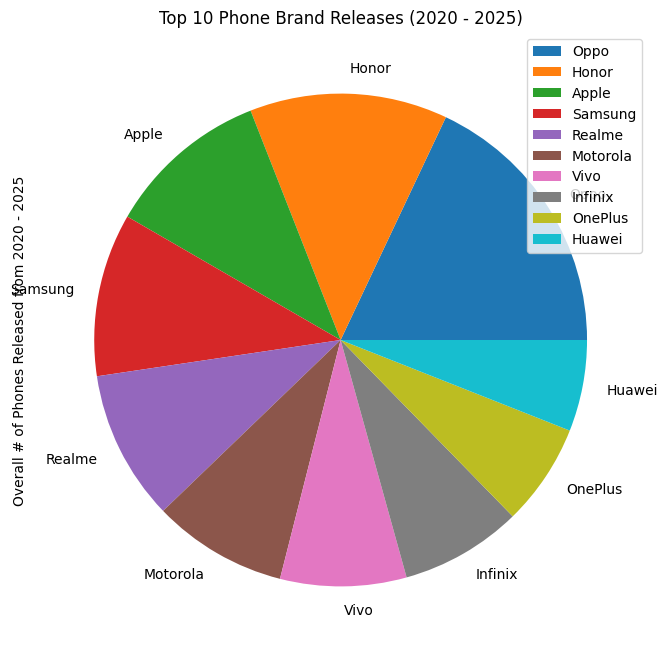

In [93]:
top10 = phones_per_brand.nlargest(10, "Overall # of Phones Released from 2020 - 2025")

top10.plot.pie(
    y = "Overall # of Phones Released from 2020 - 2025", 
    labels = top10["Company Name"], 
    figsize = (8,8), 
    title = "Top 10 Phone Brand Releases (2020 - 2025)"
)

Summary: This pie chart shows the top 10 phone brands based on how many phones they released from 2020 to 2025. Oppo and Honor released the most phones, while brands like OnePlus and Huawei released fewer. This gives a quick overview of which companies were most active in launching new models during this time.

#### Visualization #2: Bar Graph

<Axes: title={'center': 'Number of Phones by RAM Size'}, xlabel='RAM Size', ylabel='Number of Phones'>

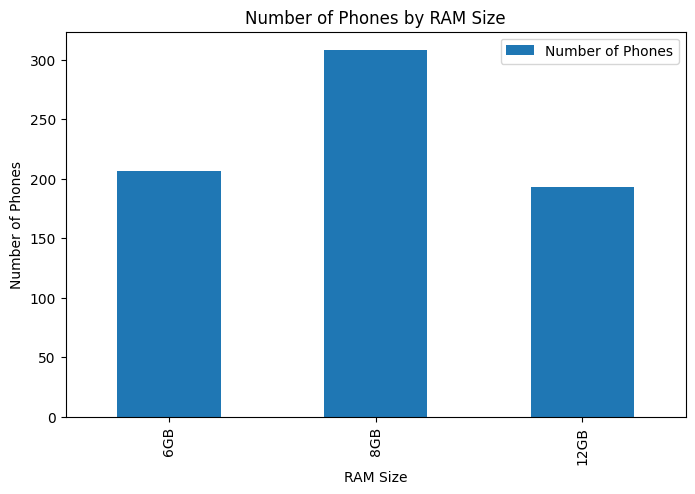

In [94]:
ram_df.plot.bar(
    x = "RAM",
    y = "Number of Phones",
    title = "Number of Phones by RAM Size",
    xlabel = "RAM Size",
    ylabel = "Number of Phones",
    figsize = (8, 5)
)

Summary: This bar graph shows how many phones have 6GB, 8GB, or 12GB of RAM. 8GB RAM is the most common, followed by 6GB and then 12 GB. This shows that most phones are made with 8GB RAM, likely because it offers good performance for most users.

#### Visualization #3 : Grouped Bar Graph

<Axes: title={'center': 'Average Smartphone Price by Company and Country (USD)'}, xlabel='Company Name', ylabel='Average Price (USD)'>

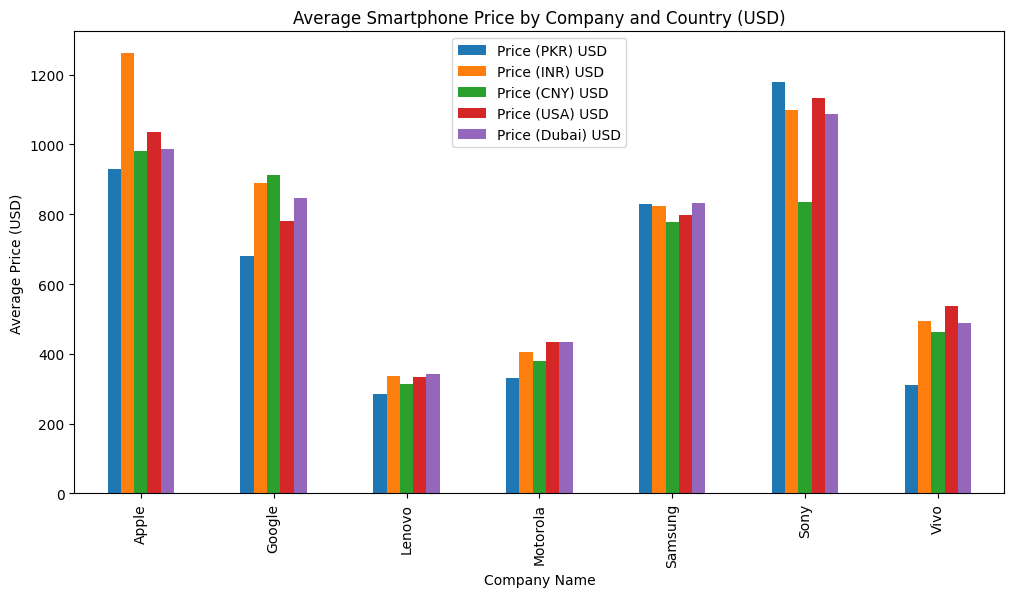

In [95]:
avg_prices_by_company.plot.bar(
    title = "Average Smartphone Price by Company and Country (USD)", 
    xlabel = "Company Name",
    ylabel = "Average Price (USD)",
    figsize = (12, 6)
)

Summary: 
This visualization shows how the average smartphone prices vary by company across five countries. Apple and Sony have the highest average prices in all regions, indicating a premium market focus. In contrast, brands like Lenovo, Motorola, and Vivo have lower prices, targeting more budget-conscious consumers. The chart also reveals that prices differ by country, suggesting companies adapt pricing strategies based on local markets.

# Section 4: Planning for Part II

#### My Observations from Exploratory Data Analysis

Through my data analysis of the Mobile Dataset, I uncovered several patterns: 
- Brand Activity: Oppo and Honor released the most number of new smartphones between 2020- 2025, while companies like Google and Sony released fewer models. 
- RAM Trends: 8GB RAM was the most common among all smartphones followed by 6GB and then 12GB. This shows a clear trend in balanced performance. 
- Price Variation by Country: Prices for the same brands of phones varied significantly by country. For instance, Apple phones were the most expensive in India, likely due to import duties or lack of local manufacturing. 
- Premium & Budget: Brands like Apple and Sony consistently had a higher average price across all countries, showing and indicating a focus on premium devices, while brands like Lenovo and Motorola had lower prices, showing that they likely target mid-range or budget customers. 

#### Ideas for PART II 

1. Question: Can we predict if a phone is overpriced in a specific country using its features and pricing in other regions?

    Plan: 
    - Use linear regression to predict a phone's expected price in a country based on its price in another region and its features. 
    - Construct a confidence interval around the predicted price. 
    - Identify phones as potentially "overpriced" if their actual price in a region lies significantly above the confidence interval.

2. Question: Are high-end phones significantly different in specs compared to Budget phones, and can we predict the category?

    Plan: 
    - Define a "Premium" phone as one with a price, which is above the median or in the top 25%. 
    - Use hypothesis testing to see if features like RAM or battery capacity are significantly different between Premium and Budget phones. 
    - Build a linear regression model to predict if a phone is Premium based on its specifications. 



3. Question: Do companies price their phones significantly differently in each country, and can we cluster companies based on their pricing strategies? 

    Plan: 
    - Use hypothesis testing to determine if the same company significantly changes prices across countries. 
    - Use clustering to group companies based on how they price phones in each region. 
        - Like for example, some companies may keep consistent pricing, while others adjust heavily. 

# Section 5: Data Science

### Question Chosen: 
Are high-end phones significantly different in specs compared to budget phones, and can we predict their price using features like battery capacity and screen size?

### Why I Chose This Question: 
I chose this question because I have always been curious about what makes a phone expensive. Is it simply the brand name, or do technical specifications like battery life truly justify the higher price? With so many phone models on the market, it is easy to assume that a higher price means better quality,  but I wanted to test that assumption using data science. By analyzing whether specs differ significantly between budget and premium phones, and predicting phone prices based on those specs, I hope to better understand how companies position their products and whether consumers are truly getting value for what they pay.

### Analysis Plan:
To explore this question, I will start by dividing phones into two categories: “Premium” and “Budget.” I will calculate the 75th percentile of the "Price (USA) USD" column. Phones priced above this threshold will be labeled as Premium, and the rest will be labeled as Budget.

Next, I will perform 2-sample Z-tests on one key specifications: Battery Capacity. I am doing this to check if the average battery capacity of Premium phones is significantly higher than that of budget phones. If the p-value is less than 0.05, I will conclude that the difference is statistically significant.

Finally, I will build a linear regression model to predict the price of a phone using battery capacity and screen size as its independent variables. This will help me analyze how much of these features influence price and whether they can explain why some phones are more expensive than others. 

### Goals I Will Achieve With This Analysis
1. Determine if Premium phones have better specs than Budget phones (battery capacity)
2. Whether technical features can be used to estimate how expensive a phone is (battery capacity & screen size)

### Cleaning Dataset

In [96]:
columns = ["Price (USA) USD", "Battery Capacity", "Screen Size"]
df_data_science = df[columns].copy()
df_data_science

,Price (USA) USD,Battery Capacity,Screen Size
0,799.0,3600,61
1,849.0,3600,61
2,899.0,3600,61
3,899.0,4200,67
4,949.0,4200,67
...,...,...,...
925,280.0,10000,121
926,300.0,10000,121
927,1899.0,4400,76
928,1719.0,4400,76


In [97]:
df_data_science.dtypes

Price (USA) USD     float64
Battery Capacity     object
Screen Size          object
dtype: object

In [98]:
# Cleaning Battery Capacity and Screen Size Column to Make them Numbers

df_data_science["Battery Capacity"] = df_data_science["Battery Capacity"].astype(float)
df_data_science["Screen Size"] = df_data_science["Screen Size"].astype(float)

#df_data_science.dtypes
df_data_science

,Price (USA) USD,Battery Capacity,Screen Size
0,799.0,3600.0,61.0
1,849.0,3600.0,61.0
2,899.0,3600.0,61.0
3,899.0,4200.0,67.0
4,949.0,4200.0,67.0
...,...,...,...
925,280.0,10000.0,121.0
926,300.0,10000.0,121.0
927,1899.0,4400.0,76.0
928,1719.0,4400.0,76.0


In [99]:
# Dropping Rows With Missing Values:
df_data_science = df_data_science.dropna(subset = ["Price (USA) USD", "Battery Capacity", "Screen Size"])
df_data_science

,Price (USA) USD,Battery Capacity,Screen Size
0,799.0,3600.0,61.0
1,849.0,3600.0,61.0
2,899.0,3600.0,61.0
3,899.0,4200.0,67.0
4,949.0,4200.0,67.0
...,...,...,...
925,280.0,10000.0,121.0
926,300.0,10000.0,121.0
927,1899.0,4400.0,76.0
928,1719.0,4400.0,76.0


### Defining Premium v.s. Budget Phones

In [100]:
#Sorting the Data Frame:
df_data_science_sort = df_data_science.sort_values(by = "Price (USA) USD", ascending = False).reset_index(drop = True)

#Length of df_data_scienc 
len_df = len(df_data_science_sort)

#Marking
df_data_science_sort["Category"] = "Budget"

for i in range(len_df):
    if i < len_df * 0.25:
        df_data_science_sort.at[i, "Category"] = "Premium"

df_data_science_sort

,Price (USA) USD,Battery Capacity,Screen Size,Category
0,79077.0,5000.0,667.0,Premium
1,63499.0,5000.0,667.0,Premium
2,42900.0,5110.0,667.0,Premium
3,39900.0,5110.0,667.0,Premium
4,39622.0,8200.0,104.0,Premium
...,...,...,...,...
925,99.0,5000.0,652.0,Budget
926,99.0,5000.0,66.0,Budget
927,89.0,5000.0,652.0,Budget
928,89.0,5000.0,652.0,Budget


## Hypothesis Testing - 2 sample Z-Test

##### Hypothesis Setup: Battery Capacity

To investigate whether premium phones have a higher average battery capacity than budget phones, I will conduct a 2-sample Z-test with the hypotheses:

Null Hypothesis: Premium phones have equal or lower average Battery Capacity than Budget phones.

Alternative Hypothesis: Premium phones have greater average Battery Capacity than Budget phones

In [101]:
from statsmodels.stats.weightstats import ztest

# Split data into 2 groups:
premium = df_data_science_sort[df_data_science_sort["Category"] == "Premium"]
budget = df_data_science_sort[df_data_science_sort["Category"] == "Budget"]


In [102]:
# T-test for Battery Capacity: Is Premium Battery Capacity > Budget?
battery_capacity_test = ztest(
    premium["Battery Capacity"], 
    budget["Battery Capacity"], 
    alternative ='larger'
)
battery_capacity_test

(np.float64(-0.9212725828886308), np.float64(0.8215459342013889))

*Z-Test for Battery Capacity Results:*

z- statistic = -0.92127

p-value = 0.82154

#### Hypothesis Testing Analysis: 

Since the p-value is much greater than 0.05, we fail to reject the null hypothesis. (0.82154 > 0.05). This means that there is not enough statistical evidence to support the claim that premium phones have a higher average battery capacity than budget phones. In addition, the negative z-statistic shows that premium phones may even have a slightly lower battery capacity on average, even though the difference is not statictically significant. 


## Linear Regression Model

##### STEP 1: Prepare the Data

In [103]:
from sklearn.linear_model import LinearRegression

ind_x = df_data_science[["Battery Capacity", "Screen Size"]]
dep_y = df_data_science["Price (USA) USD"]

##### STEP 2: Create and Train the Model

In [104]:
model = LinearRegression()
model.fit(ind_x, dep_y)

LinearRegression()

##### STEP 3: Predict

In [105]:
custom_features = [[5000, 80]]
predicted_price = model.predict(custom_features)
predicted_price

/Users/hitakiran/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([1052.26560481])

In [106]:
# Getting a Cleaner Result
custom_features = pd.DataFrame([[5000, 80]], columns=["Battery Capacity", "Screen Size"])
predicted_price = model.predict(custom_features)
predicted_price

array([1052.26560481])

In [107]:
# Getting a Cleaner Result
custom_features = pd.DataFrame([[2000, 61]], columns=["Battery Capacity", "Screen Size"])
predicted_price = model.predict(custom_features)
predicted_price

array([724.22919025])

Overall Summary of the Linear Regression Model: Based on the model using battery capacity and screen size to predict the price, I can tell that larger capacity and screen size tend to be more expensive. For example, look at the 2 predictions I made above: A hypothetical phone with a 5000 mAh battery and 80-inch screen was predicted to cost $1052.27. Another hypothetical phone with a 2000 mAh battery and 61-inch screen predicted price was $724.23. This shows that both features are positively associated with price. However battery capacity and screen size also do not fully explain the price difference, because there may be other features like RAM and camera quality that can also influence the price.

# Section 6: A Different Data Visualization

##### Box Plot: Comparing Battery Capacity

<Axes: title={'center': 'Battery Capacity'}, xlabel='Category', ylabel='Battery Capacity'>

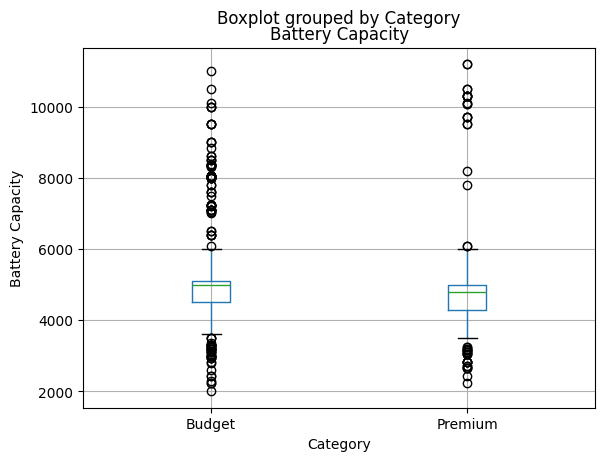

In [108]:
df_data_science_sort.boxplot(column="Battery Capacity", 
                        by="Category", 
                        xlabel = "Category", 
                        ylabel = "Battery Capacity")

Summary: This box plot compares the Battery Capacity, which is measured in mAh for Budget and Premium phones. The median is very similar for both categories, around 5000 mAh. This means that the typical phone has roughly the same battery size. The spread is also very close in both categories, with no major variation in battery capacity across price levels. In addition, both categories have many outliers. So, overall, battery capacity does not separate Premium from Budget phones. Even though premium phones cost more, they do not necessarily have bigger batteries. Looking at the outliers, some budget phones have the largest batteries. Seeing this could mean that battery size is not strongly tied to phone price.

##### Bar Chart: Count of Phones per Category

<Axes: title={'center': 'Count of Phones by Category'}, xlabel='Category', ylabel='Number of Phones'>

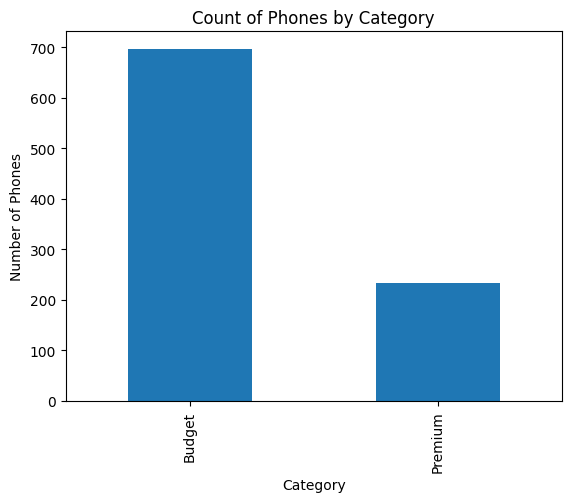

In [109]:
df_data_science_sort["Category"].value_counts().plot.bar(
    title = "Count of Phones by Category",
    xlabel = "Category",
    ylabel = "Number of Phones"
)

Summary: This bar chart shows the number of phones in each category, revealing significantly more budget phones (~700) than premium phones (~230) in the dataset. This makes sense because premium phones were defined as the top 25% based on price, meaning most phones naturally fall into the budget group. The chart highlights that high-end phones are less common, while budget models are more widely available and accessible to consumers. This also shows that when analyzing smartphone trends, budget phones represent the majority of the market and may have a bigger influence on overall industry patterns. I think that understanding this distribution is important when comparing features or making pricing predictions. 

##### Bar Chart: Average RAM by Category

<Axes: title={'center': 'Average Battery Capacity by Phone Category'}, xlabel='Category', ylabel='Average Battery Capacity (GB)'>

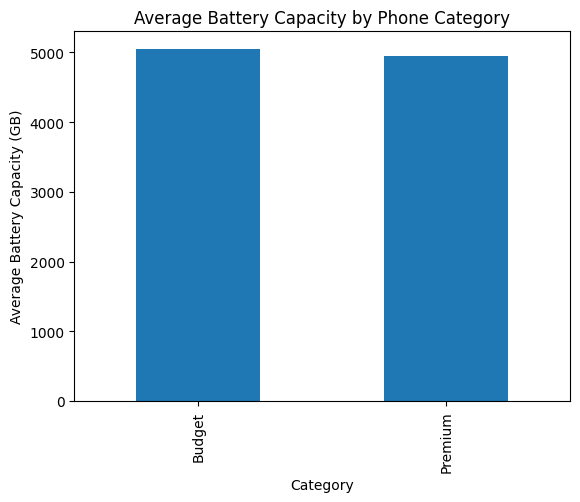

In [110]:
df_data_science_sort.groupby("Category")["Battery Capacity"].mean().plot.bar(
    title = "Average Battery Capacity by Phone Category",
    xlabel = "Category",
    ylabel = "Average Battery Capacity (GB)"
)

Summary: This bar chart shows the average battery capacity for budget and premium phones, showing that budget phones have a slightly higher average battery capacity than premium phones. Specifically, the average for budget phones is just over 500 mAh, while for premium phones it is slightly 5000 mAh. This shows that a higher price does not necessarily mean better battery capacity. This goes against the assumption that more expensive phones always offer superior hardware. This can help consumers make more informed choices by focusing on actual specifications rather than just price. 

# Section 7: Overall Summary

For this data science project, I explored a smartphone dataset with a full set of entries. The dataset included information about each phone's technical specifications such as RAM, battery capacity, screen size, and mobile weight. It also included launch prices across five countries: Pakistan, India, China, USA, and Dubai. 

To start off, I began cleaning the dataset to remove unwanted characters. I then converted all country-specific prices into USD to make the data consistent and comparable. This allowed me to perform a deeper analysis of phone pricing and features across brands and regions. 

During my exploratory data analysis, I observed that budget phones made up the majority of the dataset, with about 700 phones labeled as budget and around 230 phones as premium. I also created bar charts and pie charts to show the distribution of RAM sizes, phone counts by brand, and average battery capacity by phone type. 

Next, I performed hypothesis testing using 2-sample Z-tests to statistically compare features between budget and premium phones. I tested whether premium phones had significantly greater battery capacity than budget phones. The result showed no significant difference. I got a z-statistic (z = -0.92), and a p-value (p = 0.82), meaning a more expensive phone does not necessarily have better battery life. 

I also built a multiple linear regression model to predict a phone's price in the USA based on its battery capacity and screen size. Using my linear regression model, I tested the model by plugging in sample values to see how it predicts prices based on its features (battery capacity and screen size).For example, when I input a phone with 5000 mAh battery and 80-inch screen, the predicted price was approximately $1052. When I reduced the input to 2000 mAh battery and 61inch screen, the predicted price dropped to around $724. This showed that both battery capacity and screen size have a positive relationship with price. However, it is also important to note that the price is influenced by multiple factors beyond just those two features. 

Overall, this project taught me how to clean real-world data, create visualizations, apply statistical tests, and build predictive models like linear regression. It gave me practical experience with Python, pandas, hypothesis testing, and regression. I also learned how to draw meaningful conclusions from data and communicate my findings.